In this notebook, it shows some basic data analysis process, including percentages of different costs, and the trends for costs, revenue, and profit. 

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('financial_data.csv')

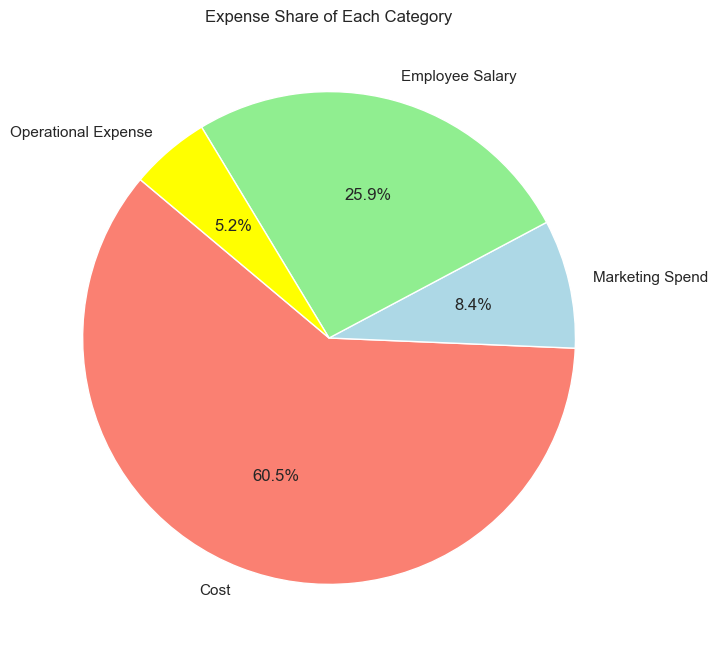

Cost Expense Ratio: 60.5%
Marketing Spend Ratio: 8.4%
Employee Salary Ratio: 25.9%
Operational Expense Ratio: 5.2%


In [36]:
total_expense = data[['Cost', 'Marketing_Spend', 'Employee_Salary', 'Operational_Expense']].sum(axis=1)
data['Cost_Expense_Ratio'] = data['Cost'] / total_expense * 100
data['Marketing_Spend_Ratio'] = data['Marketing_Spend'] / total_expense * 100
data['Employee_Salary_Ratio'] = data['Employee_Salary'] / total_expense * 100
data['Operational_Expense_Ratio'] = data['Operational_Expense'] / total_expense * 100

labels = ['Cost', 'Marketing Spend', 'Employee Salary', 'Operational Expense']
ratios = data[['Cost_Expense_Ratio', 'Marketing_Spend_Ratio', 'Employee_Salary_Ratio', 'Operational_Expense_Ratio']].mean()

plt.figure(figsize=(8,8))
plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140, colors=['salmon','lightblue','lightgreen','yellow'])
plt.title('Expense Share of Each Category')
plt.show()

ratios_percent = ratios.round(1)
print(f"Cost Expense Ratio: {ratios_percent['Cost_Expense_Ratio']}%")
print(f"Marketing Spend Ratio: {ratios_percent['Marketing_Spend_Ratio']}%")
print(f"Employee Salary Ratio: {ratios_percent['Employee_Salary_Ratio']}%")
print(f"Operational Expense Ratio: {ratios_percent['Operational_Expense_Ratio']}%")

In [37]:
desc_stats = data.describe().T
desc_stats[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
Revenue,48256.200962,48126.835000,7349.190739,34322.640000,64818.230000
Cost,36069.290962,34854.630000,7055.367433,23160.490000,53464.130000
Marketing_Spend,4911.725962,4934.505000,1177.574274,2697.470000,7955.890000
Employee_Salary,15204.344808,15510.380000,1796.401402,11970.310000,20440.340000
Operational_Expense,3054.817692,3058.460000,854.265550,1379.890000,6082.190000
Profit,-10983.978462,-11667.595000,5821.815572,-20394.600000,3478.110000
Cost_Expense_Ratio,60.451903,60.359538,5.462919,49.807455,69.869433
Marketing_Spend_Ratio,8.438133,7.996499,2.406382,4.605910,14.929479
Employee_Salary_Ratio,25.875238,25.849191,3.221721,18.980337,35.113414
Operational_Expense_Ratio,5.234727,5.131287,1.642890,2.419149,11.095174


In [38]:
sns.set(style="whitegrid")

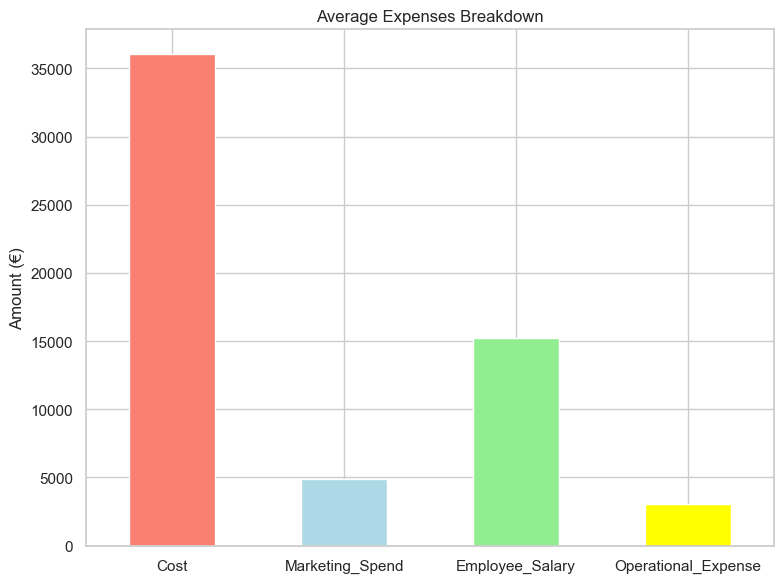

In [39]:
avg_expenses = data[['Cost','Marketing_Spend', 'Employee_Salary', 'Operational_Expense']].mean()

plt.figure(figsize=(8,6))
avg_expenses.plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen', 'yellow'])
plt.title('Average Expenses Breakdown')
plt.ylabel('Amount (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

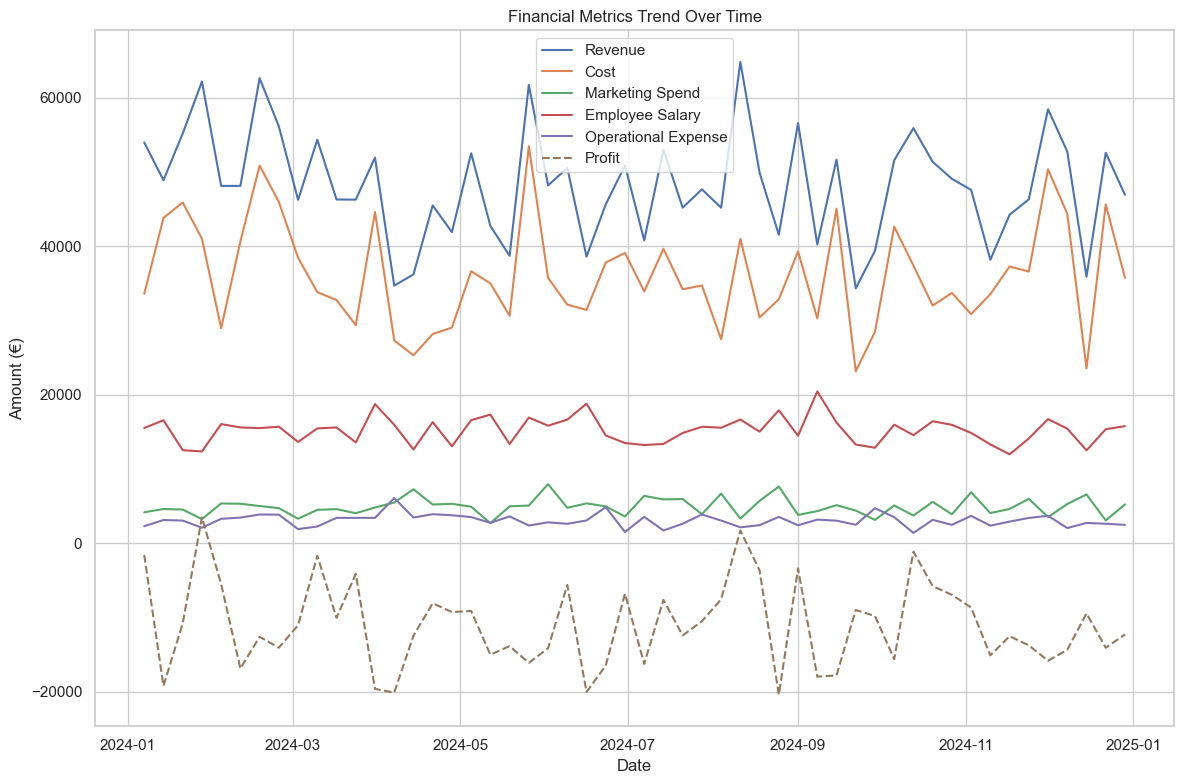

In [40]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(12,8))

sns.lineplot(x='Date', y='Revenue', data=data, label='Revenue')
sns.lineplot(x='Date', y='Cost', data=data, label='Cost')
sns.lineplot(x='Date', y='Marketing_Spend', data=data, label='Marketing Spend')
sns.lineplot(x='Date', y='Employee_Salary', data=data, label='Employee Salary')
sns.lineplot(x='Date', y='Operational_Expense', data=data, label='Operational Expense')
sns.lineplot(x='Date', y='Profit', data=data, label='Profit', linestyle='--')

plt.title('Financial Metrics Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Amount (€)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()